<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW5/MLTSA_rclarke_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLTSA - Riley Clarke - HW5

In [0]:
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

In [0]:
!pip install kaggle

In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [6]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
!kaggle competitions list -s PLAsTiCC

ref            deadline             category   reward  teamCount  userHasEntered  
-------------  -------------------  --------  -------  ---------  --------------  
PLAsTiCC-2018  2018-12-17 23:59:00  Featured  $25,000       1094            True  


In [10]:
!mkdir plasticc

mkdir: cannot create directory ‘plasticc’: File exists


In [11]:
cd plasticc

/content/gdrive/My Drive/plasticc


In [12]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [13]:
cd data

/content/gdrive/My Drive/plasticc/data


In [14]:
!kaggle competitions download PLAsTiCC-2018

test_set_batch7.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch3.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training_set_metadata.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch9.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
training_set.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch8.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
data_note.pdf.zip: Skipping, found more recently modified local copy (use --force to force download)
test_set_batch11.csv.zip: Skipping, found 

In [0]:
ls

data_note.pdf.zip          test_set_batch4.csv.zip  test_set_metadata.csv.zip
sample_submission.csv.zip  test_set_batch5.csv.zip  test_set_sample.csv.zip
test_set_batch10.csv.zip   test_set_batch6.csv.zip  training_set.csv
test_set_batch11.csv.zip   test_set_batch7.csv.zip  training_set.csv.zip
test_set_batch1.csv.zip    test_set_batch8.csv.zip  training_set_metadata.csv
test_set_batch2.csv.zip    test_set_batch9.csv.zip
test_set_batch3.csv.zip    test_set.csv.zip


In [0]:
!unzip training_set.csv.zip

Archive:  training_set.csv.zip
replace training_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training_set.csv        


In [15]:
lcvs = pd.read_csv('training_set.csv')
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [16]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [17]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [18]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [19]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [20]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


In [107]:
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())

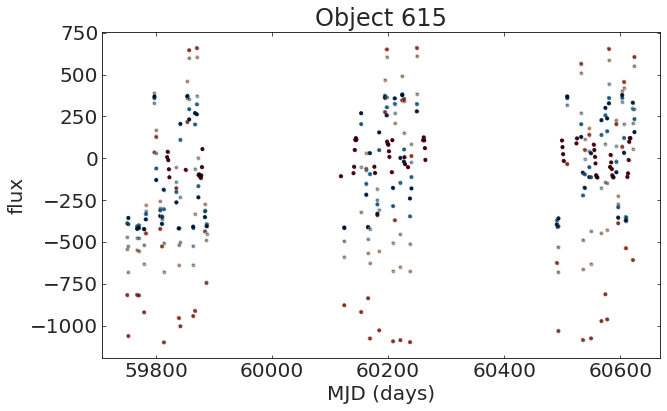

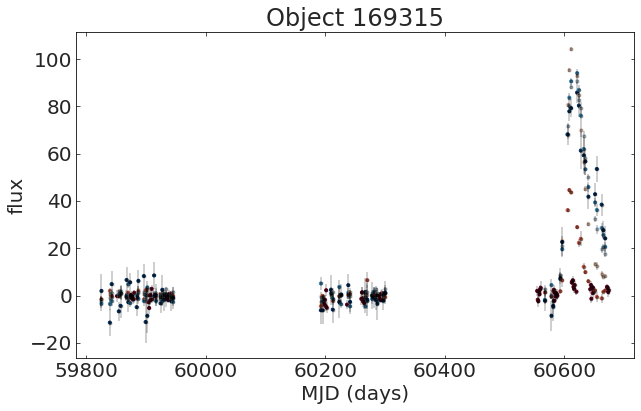

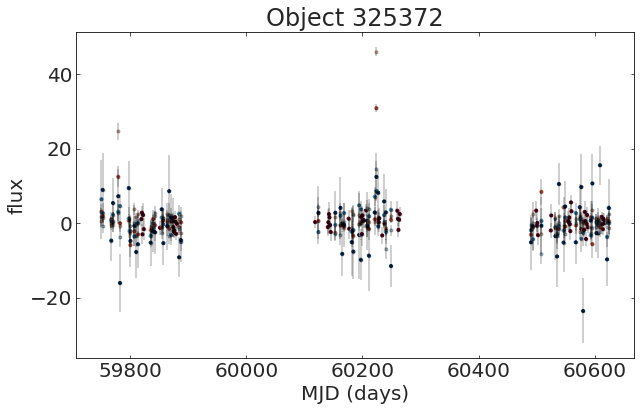

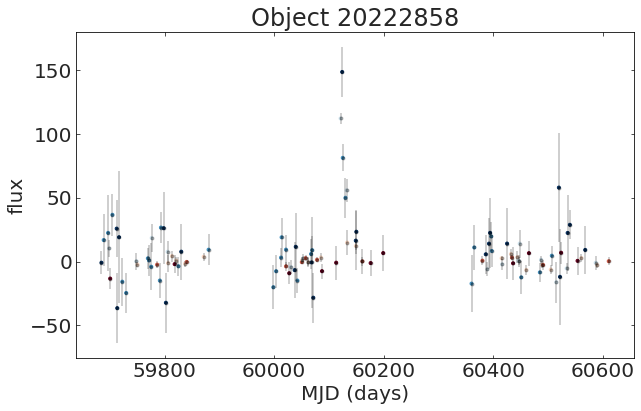

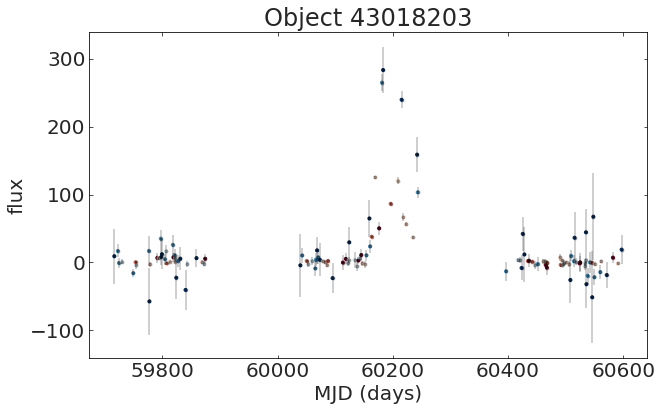

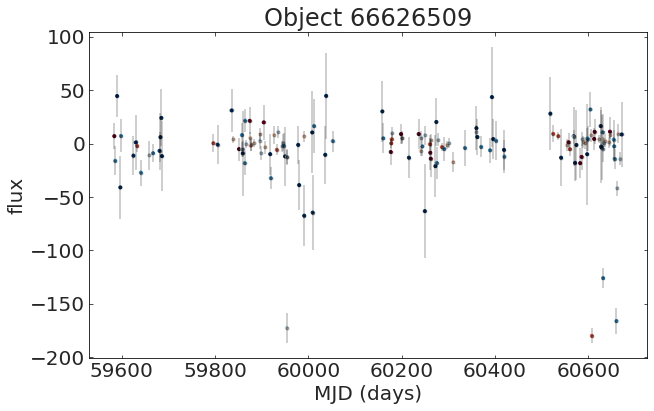

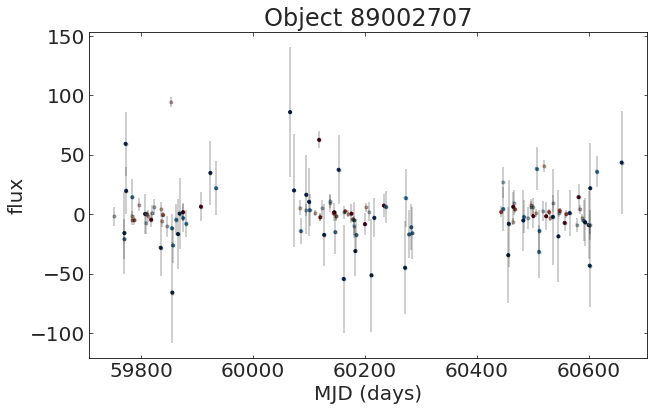

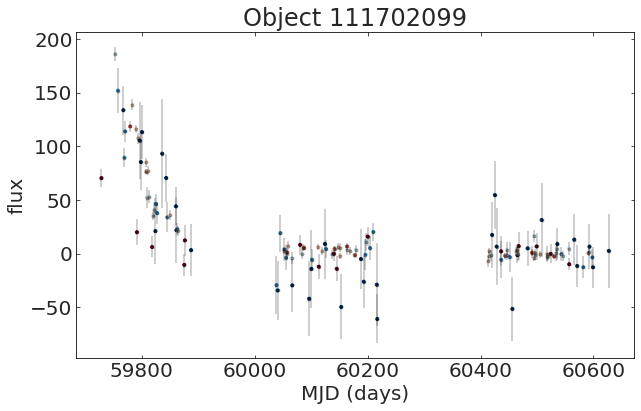

In [127]:
from matplotlib import cm

for id in lcvs['object_id'].unique()[::1000]:
  x = lcvs['mjd'].loc[lcvs['object_id'] == id]
  y = lcvs['flux'].loc[lcvs['object_id'] == id]
  yerr = lcvs['flux_err'].loc[lcvs['object_id'] == id]
  cmap = cm.get_cmap('RdBu')
  plt.scatter(x, y, c=lcvs['passband'].loc[lcvs['object_id'] == id], cmap=cmap, marker='.')
  plt.errorbar(x, y, yerr = yerr, fmt='k.', marker=None, alpha=0.25)
  plt.xlabel('MJD (days)')
  plt.ylabel('flux')
  plt.title('Object '+str(id))
  plt.show()

Figure 1: Flux vs. MJD (modified Julian date) for the each 100th object in the dataset. Each object has observations over ~200 days, with three ~200 day observation periods for each object. The objects were observed in 6 filters, denoted by the coloring of each datapoint. Some objects have notable outlier points with very large uncertainties, particularly objects 2022858 & 66626509.

## Task 4

### Task 4.1

Features to extract: 

From original lightcurve:\
-Mean\
-Standard deviation\
-Mean uncertainty

From standardized lightcurve:\
-Median

From metadata:




### Task 4.2

In [0]:
means = lcvs.groupby(["object_id", "passband"])[["flux"]].mean()
sds = lcvs.groupby(["object_id", "passband"])[["flux"]].std()
mean_err = lcvs.groupby(["object_id", "passband"])[["flux_err"]].mean()

In [0]:
features = means.rename({"flux": "mean"}, 
                        axis=1).merge(sds.rename({"flux": "std"}, 
                                axis=1), left_index=True, right_index=True).merge(mean_err.rename({"flux_err": "mean_err"}, 
                                axis=1), left_index=True, right_index=True)

In [54]:
features

mean           std   mean_err
object_id passband                                      
615       0           -3.254554     83.944735   3.823448
          1         -385.699911    601.787302   5.029014
          2         -134.146566    455.121346   3.380299
          3         -121.103501    335.425053   3.340116
          4          -55.954592    291.803449   3.798761
...                         ...           ...        ...
130779836 1          725.169852   1197.557111  26.821110
          2         2690.360415   6440.422386  46.167816
          3          755.993902   1443.868085  28.846493
          4         3489.185336  11006.766106  56.080309
          5         4151.358875   8687.101173  73.084239

[47088 rows x 3 columns]

In [0]:
from scipy import stats 
def m2f(x):
    return stats.moment(x, moment = 2)
def m3f(x):
    return stats.moment(x, moment = 3)
m2 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m2f)
m3 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m3f)

In [55]:
features = features.merge(m2.rename('m2'), left_index=True, right_index=True)
features = features.merge(m3.rename('m3'), left_index=True, right_index=True)
features

mean           std  ...            m2            m3
object_id passband                             ...                            
615       0           -3.254554     83.944735  ...  6.934866e+03  7.266579e+04
          1         -385.699911    601.787302  ...  3.559040e+05  8.593916e+07
          2         -134.146566    455.121346  ...  2.035641e+05  3.040627e+07
          3         -121.103501    335.425053  ...  1.105701e+05  1.049664e+07
          4          -55.954592    291.803449  ...  8.368116e+04  4.717542e+06
...                         ...           ...  ...           ...           ...
130779836 1          725.169852   1197.557111  ...  1.314631e+06  2.360077e+09
          2         2690.360415   6440.422386  ...  3.981988e+07  9.572595e+11
          3          755.993902   1443.868085  ...  1.989993e+06  6.673022e+09
          4         3489.185336  11006.766106  ...  1.164893e+08  5.307167e+12
          5         4151.358875   8687.101173  ...  7.169244e+07  1.380872e+12

[47088 rows x 5 columns]

In [0]:
maxs = lcvs.groupby(["object_id", "passband"])[["flux"]].max()
mins = lcvs.groupby(["object_id", "passband"])[["flux"]].min()

In [57]:
features = features.merge(maxs.rename({"flux": "max"}, 
                                axis=1), left_index=True, right_index=True).merge(mins.rename({"flux": "min"}, 
                                axis=1), left_index=True, right_index=True)
features

mean           std  ...           max          min
object_id passband                             ...                           
615       0           -3.254554     83.944735  ...    125.182808  -116.913223
          1         -385.699911    601.787302  ...    660.626343 -1100.440063
          2         -134.146566    455.121346  ...    611.984558  -681.858887
          3         -121.103501    335.425053  ...    445.737061  -530.644592
          4          -55.954592    291.803449  ...    381.953735  -422.184509
...                         ...           ...  ...           ...          ...
130779836 1          725.169852   1197.557111  ...   3320.936279   -34.273514
          2         2690.360415   6440.422386  ...  31437.089844   -14.478923
          3          755.993902   1443.868085  ...   4995.144043   -41.850040
          4         3489.185336  11006.766106  ...  54982.875000   -72.634567
          5         4151.358875   8687.101173  ...  29058.212891   -86.457382

[47088 rows x 7 columns]

## Task 4.3

In [0]:
lcvs['fluxnormed'] = (lcvs['flux'] - lcvs['flux'].mean()) / lcvs['flux'].std()

In [59]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,fluxnormed
0,615,59750.4229,2,-544.810303,3.622952,1,-0.154566
1,615,59750.4306,1,-816.434326,5.553370,1,-0.228286
2,615,59750.4383,3,-471.385529,3.801213,1,-0.134638
3,615,59750.4450,4,-388.984985,11.395031,1,-0.112274
4,615,59752.4070,2,-681.858887,4.041204,1,-0.191762


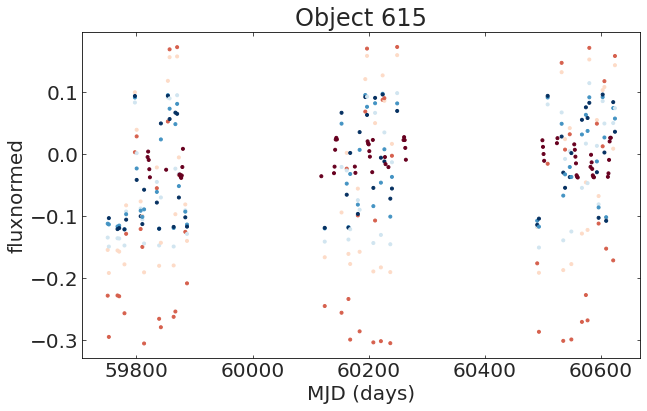

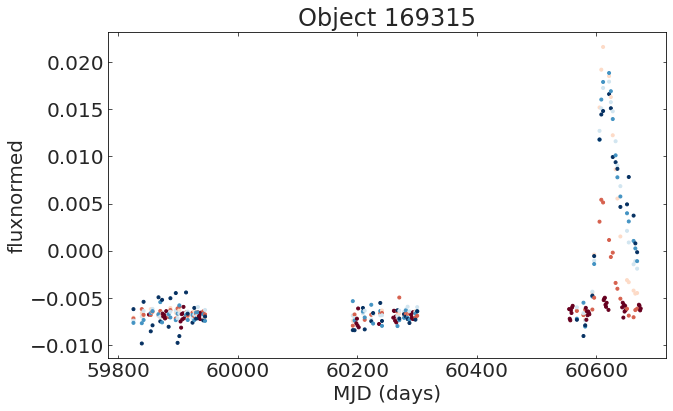

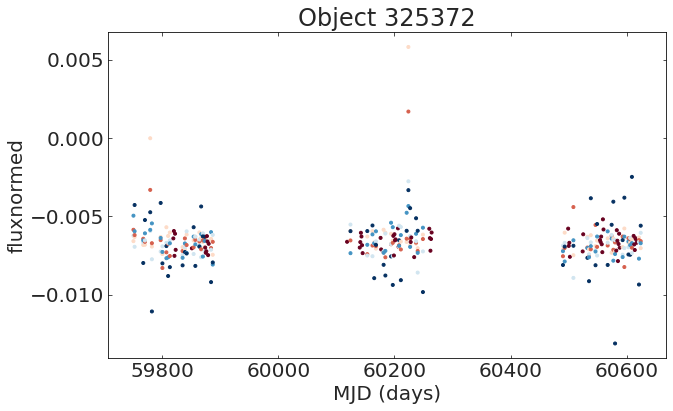

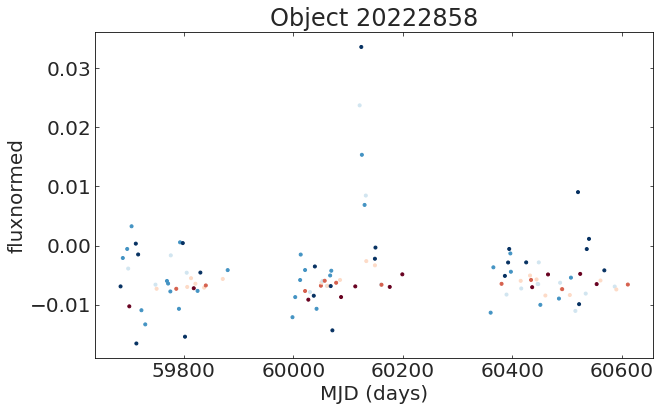

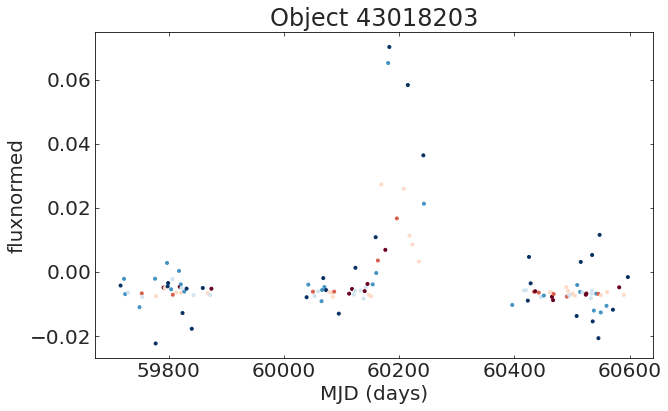

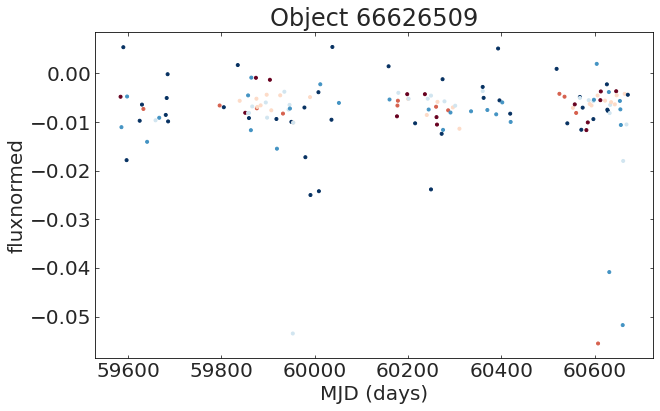

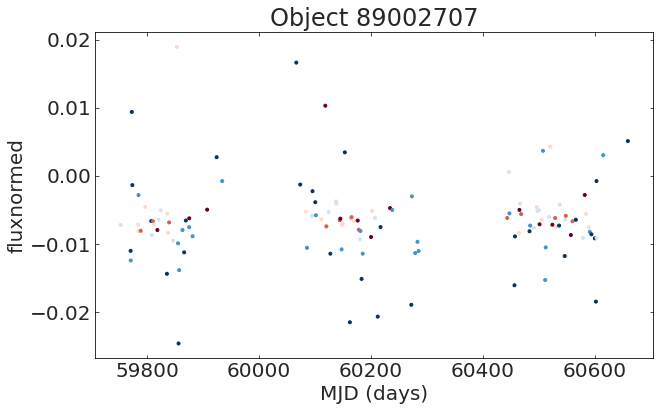

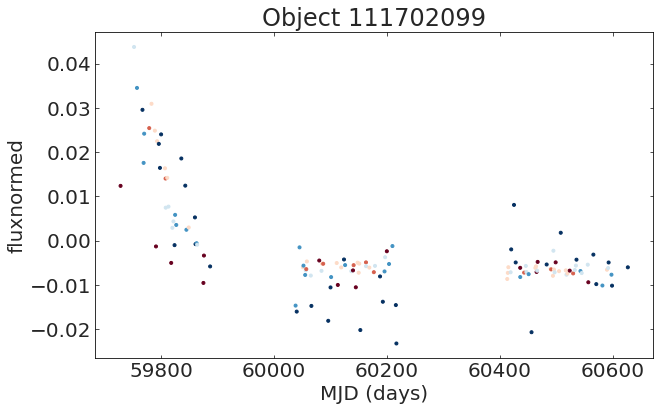

In [124]:
for id in lcvs['object_id'].unique()[::1000]:
  x = lcvs['mjd'].loc[lcvs['object_id'] == id]
  y = lcvs['fluxnormed'].loc[lcvs['object_id'] == id]
  c = lcvs['passband'].loc[lcvs['object_id'] == id]
  cmap = cm.get_cmap('RdBu')
  plt.scatter(x, y, c=lcvs['passband'].loc[lcvs['object_id'] == id], cmap=cmap, marker='.')
  plt.xlabel('MJD (days)')
  plt.ylabel('fluxnormed')
  plt.title('Object '+str(id))
  plt.show()

Figure 2: Standardized Flux for each 100th object in the dataset

In [0]:
maxs_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].max()
mins_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].min()

In [62]:
medians = lcvs.groupby(["object_id", "passband"])[["fluxnormed"]].median()

features = features.merge(medians.rename({"fluxnormed": "median"}, 
                                axis=1), left_index=True, right_index=True)
features

mean           std  ...          min    median
object_id passband                             ...                       
615       0           -3.254554     83.944735  ...  -116.913223 -0.009419
          1         -385.699911    601.787302  ... -1100.440063 -0.139163
          2         -134.146566    455.121346  ...  -681.858887 -0.078810
          3         -121.103501    335.425053  ...  -530.644592 -0.050715
          4          -55.954592    291.803449  ...  -422.184509 -0.034802
...                         ...           ...  ...          ...       ...
130779836 1          725.169852   1197.557111  ...   -34.273514  0.023061
          2         2690.360415   6440.422386  ...   -14.478923  0.101574
          3          755.993902   1443.868085  ...   -41.850040  0.039261
          4         3489.185336  11006.766106  ...   -72.634567  0.016260
          5         4151.358875   8687.101173  ...   -86.457382  0.137626

[47088 rows x 8 columns]

In [0]:
def linfit(x):
    pars = np.polyfit(range(len(x)), x["fluxnormed"].values, 1)
    return pars
linfits = lcvs.groupby(["object_id", "passband"]).apply(linfit)

In [64]:
linfits.shape

(47088,)

In [0]:
slopes = [x[0] for x in linfits.values[:]]
intercepts = [x[1] for x in linfits.values[:]]

In [66]:
features["slopes"] = slopes
features["intercepts"] = intercepts
features.head()

mean         std  ...    slopes  intercepts
object_id passband                          ...                      
615       0          -3.254554   83.944735  ...  0.000129   -0.011593
          1        -385.699911  601.787302  ...  0.002292   -0.176698
          2        -134.146566  455.121346  ...  0.002183   -0.105335
          3        -121.103501  335.425053  ...  0.001864   -0.092691
          4         -55.954592  291.803449  ...  0.001770   -0.072319

[5 rows x 10 columns]

In [68]:
from statsmodels.formula.api import ols
def quadfit(x):
    x['t'] = x.mjd - x.iloc[0].mjd
    m1 = ols(formula='fluxnormed~t + 1', data=x).fit()
    m2 = ols(formula='fluxnormed~pow(t, 2) + t + 1', data=x).fit()
    
    pars = m2.llf, m1.llf, np.sign(m2.params[1])
    return pars
ols = lcvs.groupby(["object_id", "passband"]).apply(quadfit)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
ll1 = [x[0] for x in ols.values[:]]
ll2 = [x[1] for x in ols.values[:]]
ll3 = [x[2] for x in ols.values[:]]
features["ll1"] = ll1
features["ll2"] = ll2
features["ll3"] = ll3
features.head()

mean         std  ...         ll2  ll3
object_id passband                          ...                 
615       0          -3.254554   83.944735  ...  150.030532 -1.0
          1        -385.699911  601.787302  ...   24.225287 -1.0
          2        -134.146566  455.121346  ...   41.187241 -1.0
          3        -121.103501  335.425053  ...   59.706566 -1.0
          4         -55.954592  291.803449  ...   68.596793 -1.0

[5 rows x 13 columns]

## Task 5

In [73]:
allfeatures = features.reset_index().set_index(['object_id','passband']).stack(
    ).unstack([1,2])

allfeatures.head()

passband          0                       ...           5                 
               mean        std  mean_err  ...         ll1         ll2  ll3
object_id                                 ...                             
615       -3.254554  83.944735  3.823448  ...   67.045097   66.576389 -1.0
713       -2.720398   7.113509  2.331400  ...  284.979712  284.723101 -1.0
730       -0.048080   1.828872  2.057984  ...  220.186974  218.851138  1.0
745        1.797523   4.374445  1.954723  ...  207.548223  194.794686 -1.0
1124       0.660948   2.360084  2.251139  ...  216.845895  216.705613  1.0

[5 rows x 78 columns]

In [72]:
allfeatures = allfeatures.merge(metadata, left_index=True, right_index=True)
allfeatures.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(0, mean)","(0, std)","(0, mean_err)","(0, m2)","(0, m3)","(0, max)","(0, min)","(0, median)","(0, slopes)","(0, intercepts)","(0, ll1)","(0, ll2)","(0, ll3)","(1, mean)","(1, std)","(1, mean_err)","(1, m2)","(1, m3)","(1, max)","(1, min)","(1, median)","(1, slopes)","(1, intercepts)","(1, ll1)","(1, ll2)","(1, ll3)","(2, mean)","(2, std)","(2, mean_err)","(2, m2)","(2, m3)","(2, max)","(2, min)","(2, median)","(2, slopes)","(2, intercepts)","(2, ll1)","(2, ll2)","(2, ll3)","(3, mean)",...,"(3, ll2)","(3, ll3)","(4, mean)","(4, std)","(4, mean_err)","(4, m2)","(4, m3)","(4, max)","(4, min)","(4, median)","(4, slopes)","(4, intercepts)","(4, ll1)","(4, ll2)","(4, ll3)","(5, mean)","(5, std)","(5, mean_err)","(5, m2)","(5, m3)","(5, max)","(5, min)","(5, median)","(5, slopes)","(5, intercepts)","(5, ll1)","(5, ll2)","(5, ll3)",object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
615,-3.254554,83.944735,3.823448,6934.865833,72665.792850,125.182808,-116.913223,-0.009419,1.293109e-04,-0.011593,154.236091,150.030532,-1.0,-385.699911,601.787302,5.029014,355904.026224,8.593916e+07,660.626343,-1100.440063,-0.139163,0.002292,-0.176698,24.227370,24.225287,-1.0,-134.146566,455.121346,3.380299,203564.138816,3.040627e+07,611.984558,-681.858887,-0.078810,0.002183,-0.105335,41.204201,41.187241,-1.0,-121.103501,...,59.706566,-1.0,-55.954592,291.803449,3.798761,83681.162283,4.717542e+06,381.953735,-422.184509,-0.034802,0.001770,-0.072319,68.917027,68.596793,-1.0,-47.449847,294.779522,7.636021,85370.493377,3.041829e+06,378.188141,-422.815094,-0.029913,0.001706,-0.067336,67.045097,66.576389,-1.0,103572,52.207031,-28.291550,224.208534,-55.300157,1,0.0000,0.0000,0.0000,NaN,0.007,65
713,-2.720398,7.113509,2.331400,49.879128,89.634243,14.509829,-14.735178,-0.007541,-7.999194e-05,-0.004679,391.691240,387.691398,-1.0,-1.019804,5.712334,1.416982,32.048070,-1.551087e+01,9.129021,-11.715749,-0.006853,-0.000080,-0.004775,326.226426,324.117614,-1.0,-0.794238,5.770738,1.192936,32.706748,-4.127475e+00,10.529041,-10.067919,-0.006733,-0.000084,-0.004595,327.298341,326.098044,-1.0,-0.986966,...,314.171163,-1.0,-0.900262,6.406989,2.268854,40.316483,-1.597455e+01,9.827934,-12.286801,-0.006916,-0.000088,-0.004532,311.427321,310.981814,-1.0,-1.794175,7.094073,5.314447,49.427194,7.377121e+01,14.770886,-14.211164,-0.007369,-0.000073,-0.005181,284.979712,284.723101,-1.0,118211,151.699219,3.583322,236.533224,44.205648,1,0.2420,0.2139,1.1778,40.1199,0.016,90
730,-0.048080,1.828872,2.057984,3.298318,2.093148,5.942166,-3.459960,-0.006694,-8.926267e-07,-0.006682,446.539918,446.182941,-1.0,0.141057,1.807229,1.445473,3.203266,2.623669e+00,5.693109,-3.393080,-0.006654,0.000002,-0.006702,323.335019,323.232780,-1.0,2.400870,5.559483,1.254838,30.313471,3.864890e+02,20.994711,-2.848838,-0.006567,0.000041,-0.007084,274.034768,272.618804,1.0,3.236164,...,250.970696,1.0,4.308728,10.710344,2.502323,112.462234,2.936931e+03,41.159981,-5.836310,-0.006428,0.000066,-0.007170,232.635280,231.713656,1.0,4.539396,13.332758,6.011377,174.276892,3.751336e+03,47.310059,-19.159811,-0.006011,0.000071,-0.007243,220.186974,218.851138,1.0,121266,151.347656,3.583322,236.252362,43.918627,1,0.4062,0.5002,0.0481,42.2623,0.015,42
745,1.797523,4.374445,1.954723,18.869993,162.368381,18.014029,-3.874349,-0.006414,-1.554049e-05,-0.005661,396.577024,384.815158,-1.0,5.717394,25.964659,1.316564,662.124902,1.161627e+05,192.244293,-3.618410,-0.006460,-0.000027,-0.004408,201.175078,198.555905,-1.0,9.711532,31.957997,1.155521,1003.075853,1.758302e+05,220.795212,-2.159753,-0.006585,-0.000034,-0.003140,193.011900,186.920228,-1.0,14.412924,...,181.872778,-1.0,13.134436,33.069053,2.786468,1074.034376,1.190633e+05,183.633118,-15.494463,-0.006356,-0.000043,-0.001957,196.876628,185.020305,-1.0,10.746138,26.060130,6.698346,666.782529,5.309464e+04,141.513290,-10.249387,-0.005954,-0.000020,-0.003246,207.548223,194.794686,-1.0,123211,150.996094,2.985506,236.647967,43.287350,1,1

In [75]:
print("My feature space is {} features (columns)".format(allfeatures.shape[1]))

My feature space is 78 features (columns)


## Task 6

In [76]:
print("there are {} NaN and {} infinity entries".format(
 (allfeatures.isna().sum().sum()), np.prod(allfeatures.shape) - (np.isfinite(allfeatures).sum().sum())))

there are 0 NaN and 0 infinity entries


In [0]:
X = allfeatures.iloc[:,:-1]
y = allfeatures.iloc[:,-1]

import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, train_size=0.4, random_state=69)

In [83]:
from sklearn import preprocessing
Xtrain_scaled = preprocessing.scale(X_train)
Xtest_scaled = preprocessing.scale(X_test)

print("scaled training data feature mean and standard deviations: ", 
      Xtrain_scaled.mean(axis=0), Xtrain_scaled.std(axis=0))

scaled training data feature mean and standard deviations:  [ 2.26359585e-18 -3.39539377e-18 -3.39539377e-18 -3.39539377e-18
  1.01861813e-17 -7.92258546e-18  0.00000000e+00  6.79078754e-18
 -2.26359585e-18 -6.79078754e-18 -2.15041605e-17  2.26359585e-18
  3.05585439e-17  4.52719169e-18 -1.13179792e-18  4.52719169e-18
  1.13179792e-18  2.26359585e-18  0.00000000e+00  0.00000000e+00
  4.52719169e-18  4.52719169e-18  0.00000000e+00 -7.92258546e-18
  1.81087668e-17 -7.46986629e-17 -4.52719169e-18  1.81087668e-17
  5.65898961e-19 -4.52719169e-18  6.79078754e-18 -4.52719169e-18
  1.13179792e-18  5.65898961e-19  8.48848442e-18  2.26359585e-18
 -1.13179792e-18 -1.13179792e-17  2.03723626e-17  2.26359585e-18
  6.79078754e-18 -1.13179792e-18  0.00000000e+00 -1.13179792e-18
 -2.26359585e-18  3.96129273e-18 -1.13179792e-18  3.39539377e-18
  4.52719169e-18  1.13179792e-18 -6.79078754e-18  7.58304608e-17
  0.00000000e+00 -5.65898961e-18  0.00000000e+00 -6.22488857e-18
  6.79078754e-18  0.00000000e+

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


# Task 7

In [0]:
from sklearn.manifold import TSNE

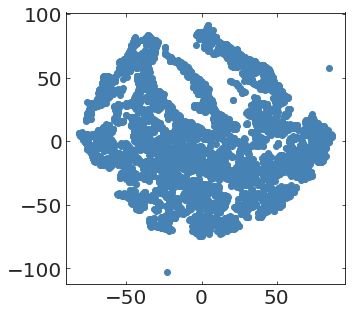

In [86]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(X)
X_embedded.shape
plt.figure(figsize=(5,5))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

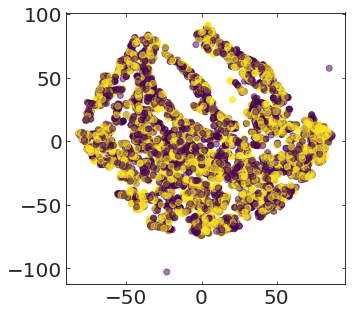

In [100]:
norm_obj = Normalize(vmin=y.min(), vmax=y.max())
len([c for c in plt.cm.RdBu_r(norm_obj(y.values))]), X_embedded.shape
plt.figure(figsize=(5,5))
plt.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in plt.cm.viridis(norm_obj(y.values))], alpha=0.5);

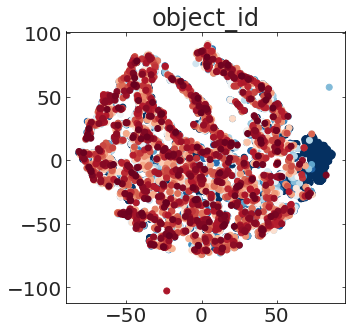

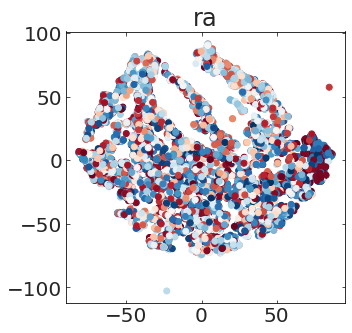

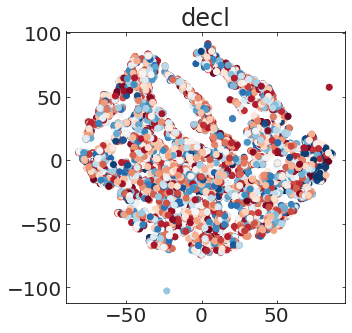

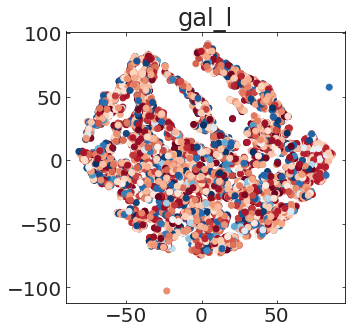

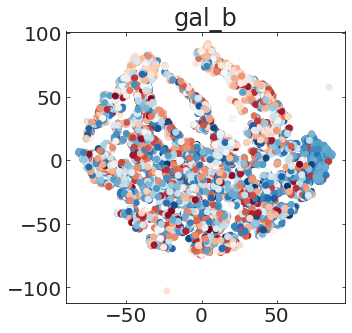

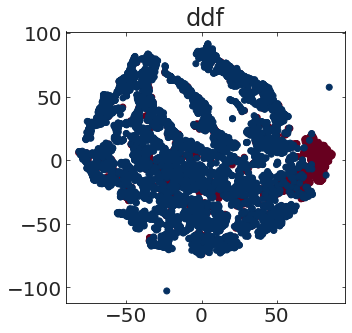

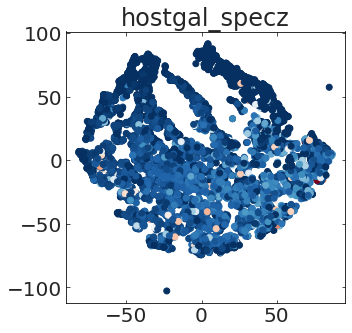

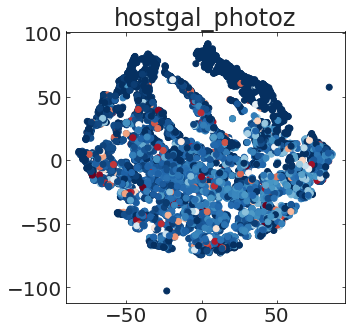

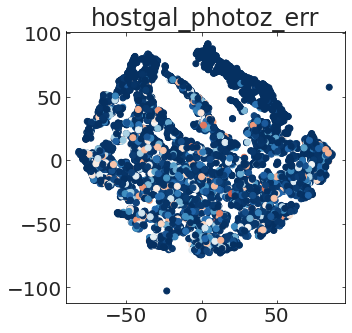

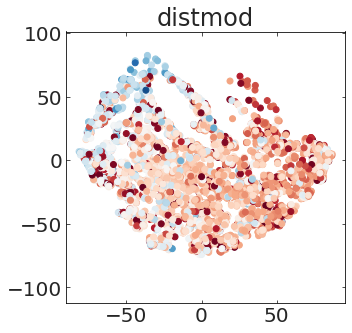

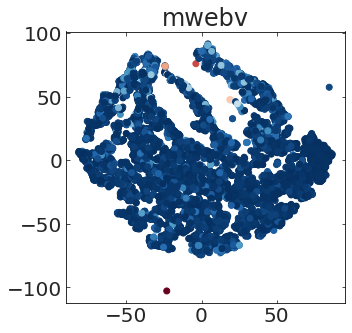

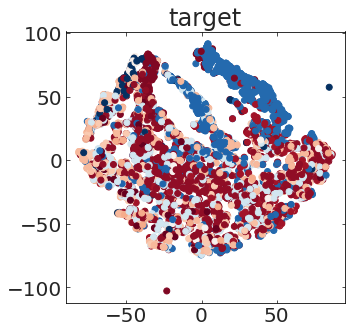

In [103]:
for col in metadata.columns:
    v = metadata[col].astype(float)
    plt.figure(figsize=(5,5))
    plt.title(col)
    plt.scatter(X_embedded[:,0], X_embedded[:,1],  color=[plt.cm.RdBu_r(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])

    plt.show()